In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag):
    
    G_Best_Not_Improved_Counter = 1
    Number_Of_Variables = problem.Number_Of_Variables
    Upper_Bounds = problem.Upper_Bounds
    Lower_Bounds = problem.Lower_Bounds
    
#     Number_Of_Variables = 10 # they called this nVar
#     Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
#     Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb


    
    
    ### Defining the hyperparameters



    # Weight_Of_Inertia = 1 ## This is the hyperparameter "w"
    W_Max = 0.9 ## this is the Initial weight of the inertia
    W_Min = 0.2 ## this is the final weight of the inertia
    c1 = 2 ## This is the individual weight (best found location so far)
    c2 = 2 ## this is the social weight (best found location from team)
    vMax = (Upper_Bounds - Lower_Bounds)*0.2
    vMin = -vMax






    ## initializing the Swarm object


    class Particles(object):
        def __init__(self, Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST):
            self.V = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.O = 10**30*np.ones(Number_Of_Particles)
            for k in range (0,Number_Of_Particles):
                self.X[k,:] = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds


            self.PBEST = PBEST(Number_Of_Variables,Number_Of_Particles)

    class PBEST(object):

        def __init__(self,Number_Of_Variables,Number_Of_Particles):
    #             self.X[k,:] = np.zeros(Number_Of_Variables)
                self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
                self.O = 10**30*np.ones(Number_Of_Particles)



    class GBEST(object):

        def __init__(self,Number_Of_Variables,Number_Of_Particles):
    #             self.X[k,:] = np.zeros(Number_Of_Variables)
                self.X = np.zeros(Number_Of_Variables)
                self.O = 10**30


    class Swarm(object):

        def __init__(self,Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles):
            self.Particles = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)
            self.GBEST = GBEST(Number_Of_Variables,Number_Of_Particles)


    
    
    
    
    ################ This is the main Loop
    Swarm1 = Swarm(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles)


    ## Get the initial GBEST of the swarm
    
    I = np.argmin(Swarm1.Particles.O)
    Swarm1.GBEST.O = Swarm1.Particles.O[I]
    Swarm1.GBEST.X = Swarm1.Particles.X[I,:]
    
    
    # print(Swarm1.Particles.PBEST.O)
    Cost_Vector = np.zeros(Number_Of_Iterations)
    Average_Objective = np.zeros(Number_Of_Iterations)
    for t in range(0,Number_Of_Iterations):

        G_Best_Not_Improved_Counter +=1
        
        ## this is to get the 
        
        ## This should be vectorized
#         for k in range(0,Number_Of_Particles):

#             ## Calculate the curent Objective
#             Swarm1.Particles.O[k] = problem.fobj(Swarm1.Particles.X[k,:]) 

#             ## particle history
            
#             Position_History[t,k,:] = Swarm1.Particles.X[k,:]
#             ##  update PBEST
#             if Swarm1.Particles.O[k] < Swarm1.Particles.PBEST.O[k]:
#                 Swarm1.Particles.PBEST.O[k] = Swarm1.Particles.O[k]
#                 Swarm1.Particles.PBEST.X[k,:] = Swarm1.Particles.X[k,:]          

#             ## Update GBEST
#             if Swarm1.Particles.O[k] < Swarm1.GBEST.O:
#                 Swarm1.GBEST.O = Swarm1.Particles.O[k]   
#                 Swarm1.GBEST.X[:] = Swarm1.Particles.X[k,:]  
#                 G_Best_Not_Improved_Counter = 0
        #### Update the X and V vectors
        w = W_Max - t*(W_Max - W_Min)/Number_Of_Iterations

        for k in range(0,Number_Of_Particles):
            
            
        
            
            ## Calculate the curent Objective
            Swarm1.Particles.O[k] = problem.fobj(Swarm1.Particles.X[k,:]) 

            ## particle history
            Position_History[t,k,:] = Swarm1.Particles.X[k,:]
            
            ##  update PBEST
            if Swarm1.Particles.O[k] < Swarm1.Particles.PBEST.O[k]:
                Swarm1.Particles.PBEST.O[k] = Swarm1.Particles.O[k]
                Swarm1.Particles.PBEST.X[k,:] = Swarm1.Particles.X[k,:]          

            ## Update GBEST
            if Swarm1.Particles.O[k] < Swarm1.GBEST.O:
                Swarm1.GBEST.O = Swarm1.Particles.O[k]   
                Swarm1.GBEST.X[:] = Swarm1.Particles.X[k,:]  
                G_Best_Not_Improved_Counter = 0
            
            
            
            
            Swarm1.Particles.V[k,:] = w*Swarm1.Particles.V[k,:]\
                                    + c1*np.random.rand(Number_Of_Variables)*(Swarm1.Particles.PBEST.X[k,:] - Swarm1.Particles.X[k,:] )\
                                    + c2*np.random.rand(Number_Of_Variables)*(Swarm1.GBEST.X- Swarm1.Particles.X[k,:] )




            ## Velocity Checking and limitation
            index1 = np.nonzero(Swarm1.Particles.V[k,:] > vMax)
            index2 = np.nonzero(Swarm1.Particles.V[k,:] < vMin)

            if Swarm1.Particles.V[k,index1].shape[1] >= 1:
                Swarm1.Particles.V[k,index1] = vMax[index1]

            if Swarm1.Particles.V[k,index2].shape[1] >= 1:
                Swarm1.Particles.V[k,index2] = vMin[index2]



            ## Position Checking and limitation
            index1 = np.nonzero(Swarm1.Particles.V[k,:] > Upper_Bounds[0])
            index2 = np.nonzero(Swarm1.Particles.V[k,:] < Lower_Bounds[0])

            if Swarm1.Particles.V[k,index1].shape[1] >= 1:
                Swarm1.Particles.V[k,index1] = Upper_Bounds[index1]

            if Swarm1.Particles.V[k,index2].shape[1] >= 1:
                Swarm1.Particles.V[k,index2] = Lower_Bounds[index2]

            Swarm1.Particles.X[k,:] = Swarm1.Particles.X[k,:] + Swarm1.Particles.V[k,:]

            
            
            
            
    #     print(np.max(Swarm1.Particles.V))
        Cost_Vector[t] =    Swarm1.GBEST.O
        Average_Objective[t] = np.mean(Swarm1.Particles.PBEST.O)
        
        if G_Best_Not_Improved_Counter > Threshold_Number_Of_Iterations_Without_Improvement:
            break
        
        
    if Visualization_Flag:     
        plt.plot(Cost_Vector)
            


    return Swarm1.GBEST.O, Swarm1.GBEST.X, Cost_Vector,Average_Objective

1098333.4928950635


C:\Users\benjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
C:\Users\benjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


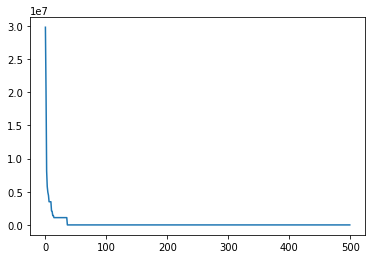

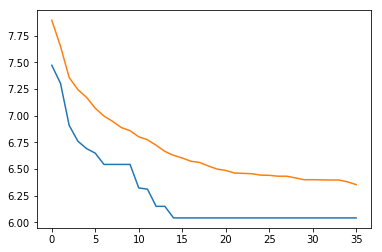

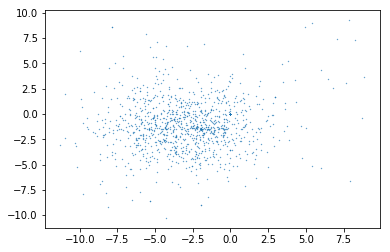

In [10]:
def fun(X_Swarm): ## this is the sphere function
    
#     print((10**(6*np.arange(len(X_Swarm))/len(X_Swarm))))
    return np.sum((10**(6*np.arange(len(X_Swarm))/len(X_Swarm)))*(X_Swarm )**2,0)




class Problem(object):
    
    def __init__(self,Number_Of_Variables):
            self.Number_Of_Variables = Number_Of_Variables
            self.Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
            self.Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb
            self.fobj = fun

            
            
Number_Of_Variables = 40
problem = Problem(Number_Of_Variables)
Visualization_Flag = 1


Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter

Threshold_Number_Of_Iterations_Without_Improvement = 20

Position_History = np.zeros((Number_Of_Iterations,Number_Of_Particles,Number_Of_Variables))

O_min,X_min,Cost_Vector,Average_Objective = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)

if np.min(Cost_Vector < 10**-8):
    First_Index_Below_10_Minus_8 = np.min(np.arange(Number_Of_Iterations)[np.nonzero(Cost_Vector < 10**-8)])
    print(First_Index_Below_10_Minus_8)
    print(np.log10(First_Index_Below_10_Minus_8*Number_Of_Particles/Number_Of_Variables))

# print(Cost_Vector)
print(O_min)


plt.figure(5)
plt.plot(np.log10(Cost_Vector))
plt.plot(np.log10(Average_Objective))


plt.figure(10)
plt.scatter(Position_History[:,:,0],Position_History[:,:,1],0.1)

6.194773013874548
3.0084576501194187


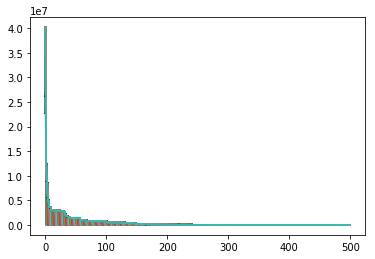

In [7]:


Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter


O_min,X_min,Cost_Vector1,Average_Objective1 = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)
print(O_min)




Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter


O_min,X_min,Cost_Vector2,Average_Objective2 = Optimize_With_PSO(problem,Number_Of_Particles,Number_Of_Iterations,Visualization_Flag)
print(O_min)